In [5]:
import pandas as pd
import numpy as np
from collections import deque
from itertools import islice
import pylab as plt
%matplotlib inline  

In [14]:
def window(iterable, size=2):
         iterable = iter(iterable)
         d = deque(islice(iterable, size), size)
         yield d
         for x in iterable:
                 d.append(x)
                 yield d

# Etude du modèle CTRW 

## Motivation

On ne comprend pas comment l'introduction de temps de résidence distribués en loi de puissance peut modifier les concentrations à l'équilibre. L'argument principal est qu'à l'équilibre, tous les sites doivent être équivalents donc la densité de probabilité des protéines doit être uniforme, les protéines diffusant de manière indépendante, la probabilité de rencontre de deux protéine ne devrait pas être affectée par l'introduction de ces temps de résidence... 

## Hypothèse : l'équilibre n'est jamais atteint

Voici les paramètres standards des simulations : 
$$ \alpha = 0.8 $$
$$ \tau_c = 5.10^4 $$
$$ \Delta t = 1 $$

On peut calculer les moments du temps de résidence d'une protéine : 
$$ <\tau> = \int_{\Delta t}^{\tau_c} \tau \phi (\tau) d\tau \approx 30$$
$$ <\tau^2> = \int_{\Delta t}^{\tau_c} \tau^2 \phi (\tau) d\tau \approx 2,9.10^5$$

Soit : 
$$ \sqrt{<\tau^2> - <\tau>^2} \approx 538 $$

Pour une simulation d'un temps suffisamment grand (10**4), cela ne paraît pas génant. Cependant cette moyenne n'est pas celle qui est observé en pratique. En effet, après un temps suffisamment long, la probabilité d'observer le temps de résidence \tau est proportinelle à :
$$ \tau * \phi(\tau) $$
D'où : 
$$ \bar{\tau} = \int_{\Delta t}^{\tau_c} \tau^2 \phi (\tau) d\tau \approx 2,9.10^5 $$

On peut alors se demander si l'équilibre supposé dans les figures 5.C et 5.D est bien atteint. 

## Etude des données

In [33]:
mean_res_time_5000 = pd.read_csv("res_time_study/res_time_simulation_tau=5000.csv")
graph_MT_5000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_5000['tau_moy'], 1000))}
graph_NM_5000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_5000['card_tau_<0'], 1000))}

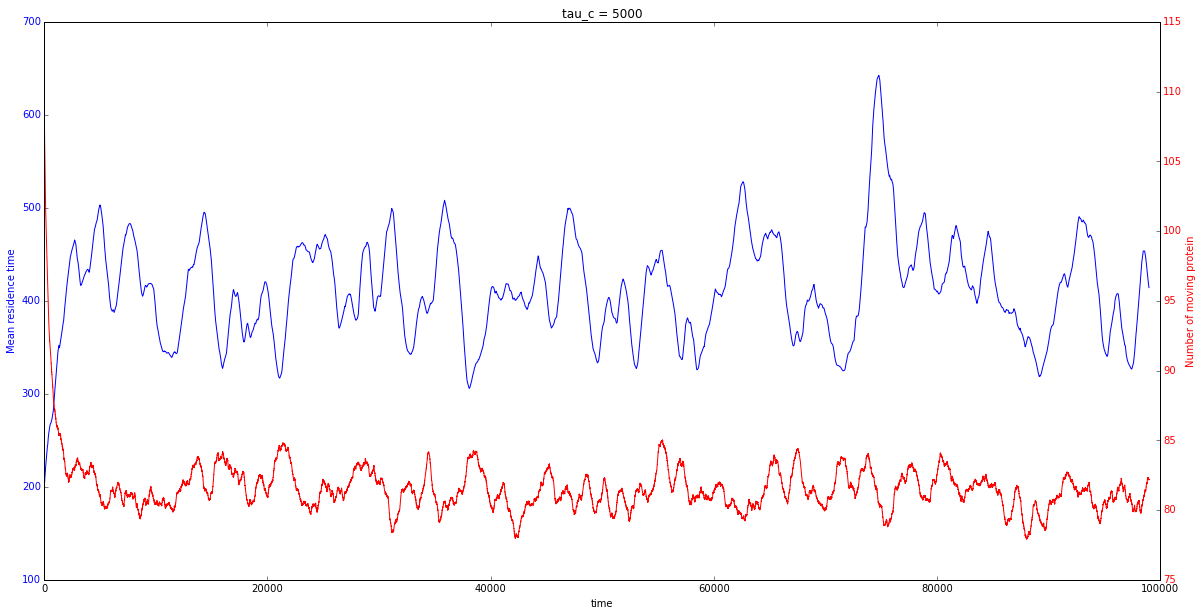

In [34]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title("tau_c = 5000")
t = np.arange(0.01, 10.0, 0.01)
ax1.plot(graph_MT_5000.keys(), graph_MT_5000.values(), 'b')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Mean residence time', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(graph_NM_5000.keys(), graph_NM_5000.values(), 'r')
ax2.set_ylabel('Number of moving protein', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [30]:
mean_res_time_10000 = pd.read_csv("res_time_study/res_time_simulation_tau=10000.csv")
graph_MT_10000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_10000['tau_moy'], 1000))}
graph_NM_10000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_10000['card_tau_<0'], 1000))}

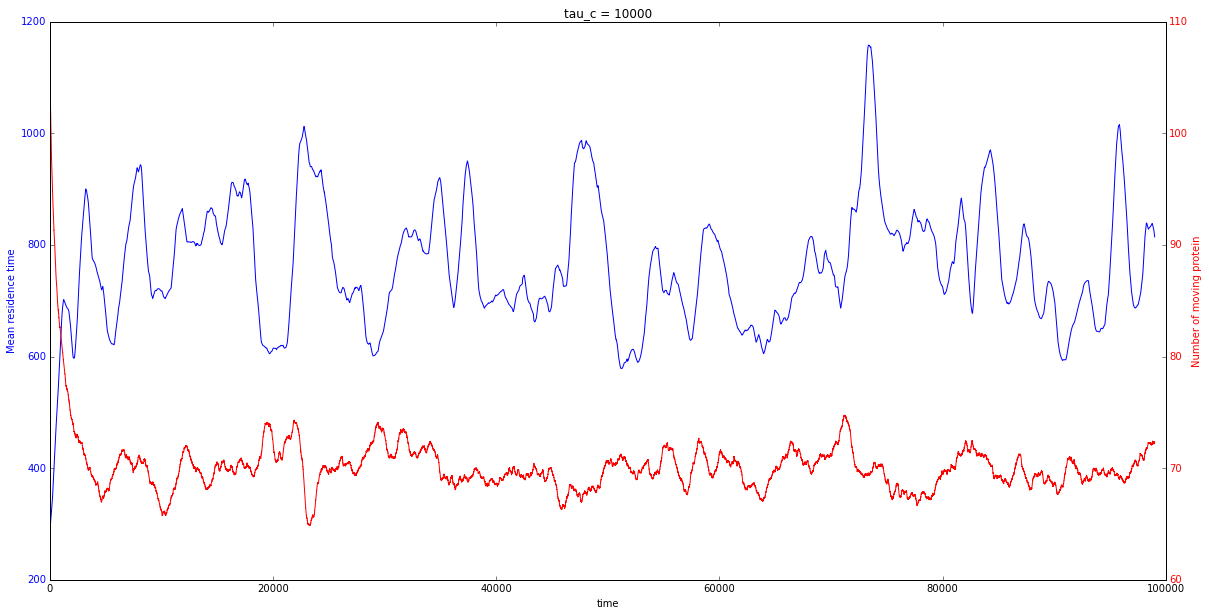

In [32]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title("tau_c = 10000")
t = np.arange(0.01, 10.0, 0.01)
ax1.plot(graph_MT_10000.keys(), graph_MT_10000.values(), 'b')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Mean residence time', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(graph_NM_10000.keys(), graph_NM_10000.values(), 'r')
ax2.set_ylabel('Number of moving protein', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [35]:
mean_res_time_50000 = pd.read_csv("res_time_study/res_time_simulation_tau=50000.csv")
graph_MT_50000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_50000['tau_moy'], 1000))}
graph_NM_50000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_50000['card_tau_<0'], 1000))}

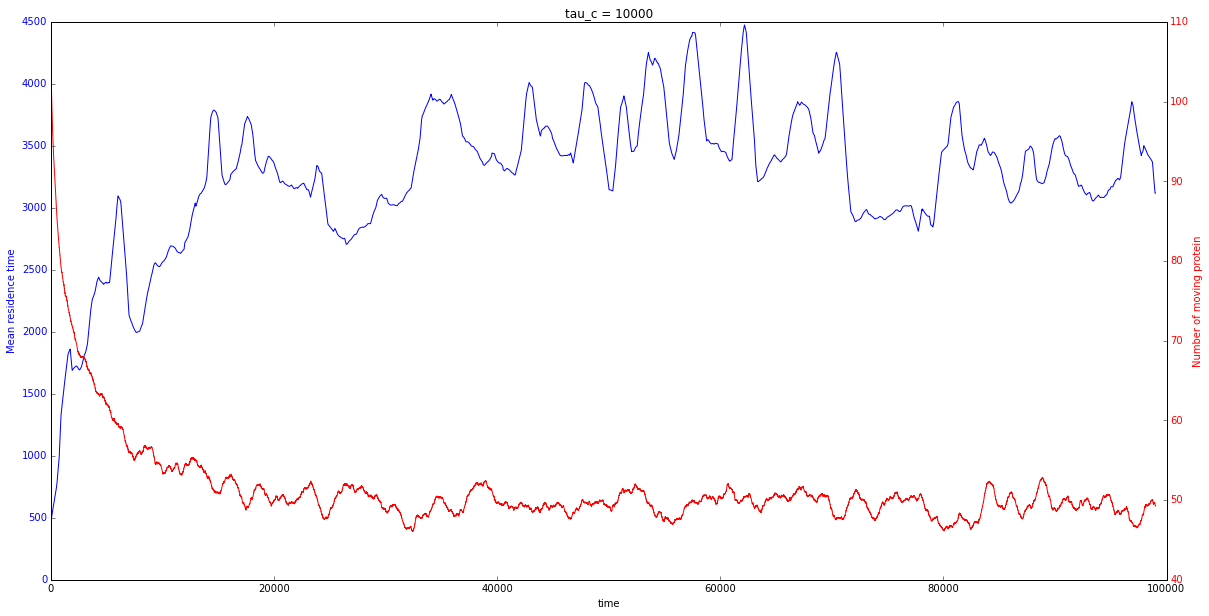

In [36]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title("tau_c = 10000")
t = np.arange(0.01, 10.0, 0.01)
ax1.plot(graph_MT_50000.keys(), graph_MT_50000.values(), 'b')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Mean residence time', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(graph_NM_50000.keys(), graph_NM_50000.values(), 'r')
ax2.set_ylabel('Number of moving protein', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [53]:
mean_res_time_100000 = pd.read_csv("res_time_study/res_time_simulation_tau=100000.csv")
graph_MT_100000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_100000['tau_moy'], 10000))}
graph_NM_100000 = {i: np.mean(d) for i, d in enumerate(window(mean_res_time_100000['card_tau_<0'], 10000))}

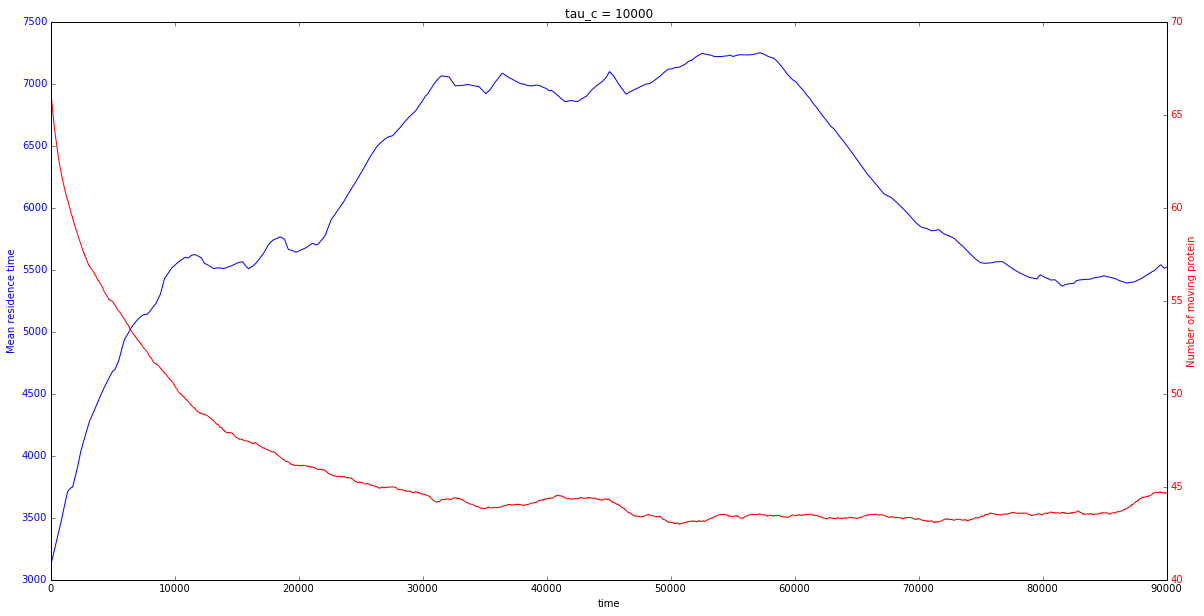

In [54]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title("tau_c = 10000")
t = np.arange(0.01, 10.0, 0.01)
ax1.plot(graph_MT_100000.keys(), graph_MT_100000.values(), 'b')
ax1.set_xlabel('time')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Mean residence time', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(graph_NM_100000.keys(), graph_NM_100000.values(), 'r')
ax2.set_ylabel('Number of moving protein', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [ ]:
equi_vs_tau_50 = pd.read_csv("equilibrium_vs_tau/data_50.csv")
equi_vs_tau_200 = pd.read_csv("equilibrium_vs_tau/data_200.csv")
equi_vs_tau_800 = pd.read_csv("equilibrium_vs_tau/data_800.csv")
equi_vs_tau_1600 = pd.read_csv("equilibrium_vs_tau/data_1600.csv")
equi_vs_tau_3200 = pd.read_csv("equilibrium_vs_tau/data_3200.csv")
equi_vs_tau_6400 = pd.read_csv("equilibrium_vs_tau/data_6400.csv")
equi_vs_tau_12800 = pd.read_csv("equilibrium_vs_tau/data_12800.csv")

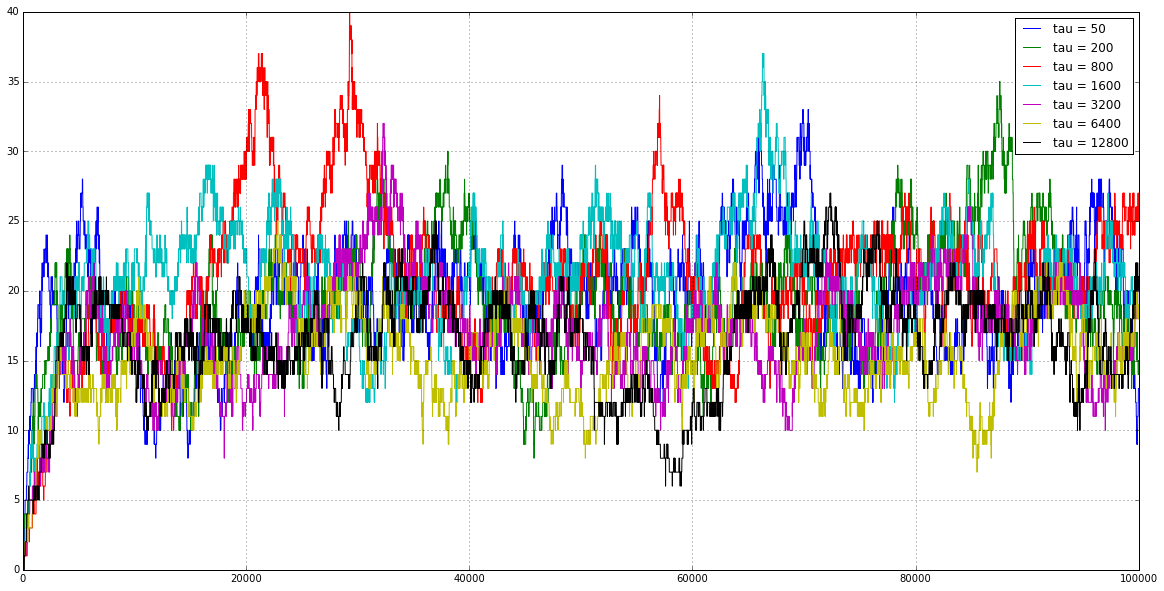

In [13]:
plt.figure(figsize=(20, 10))
equi_vs_tau_50['C'].plot(label="tau = 50")
equi_vs_tau_200['C'].plot(label="tau = 200")
equi_vs_tau_800['C'].plot(label="tau = 800")
equi_vs_tau_1600['C'].plot(label="tau = 1600")
equi_vs_tau_3200['C'].plot(label="tau = 3200")
equi_vs_tau_6400['C'].plot(label="tau = 6400")
equi_vs_tau_12800['C'].plot(label="tau = 12800")
plt.legend()

In [15]:
graph_50 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_50['C'], 1000))}
graph_200 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_200['C'], 1000))}
graph_800 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_800['C'], 1000))}
graph_1600 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_1600['C'], 1000))}
graph_3200 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_3200['C'], 1000))}
graph_6400 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_6400['C'], 1000))}
graph_12800 = {i: np.mean(d) for i, d in enumerate(window(equi_vs_tau_12800['C'], 1000))}

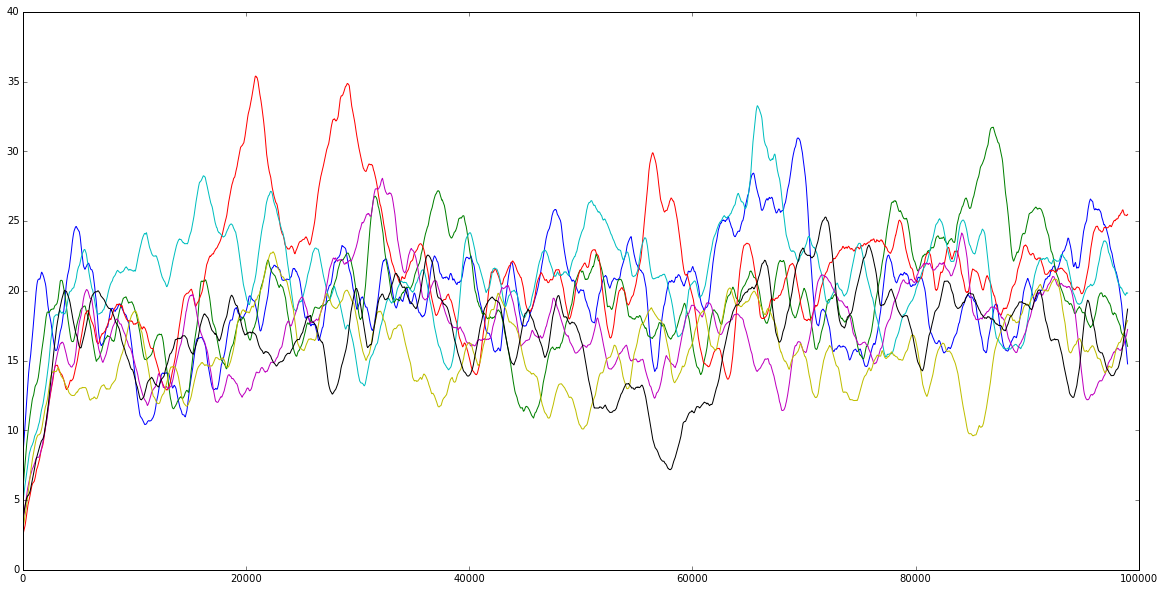

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(graph_50.keys(), graph_50.values(), label="tau = 50")
plt.plot(graph_200.keys(), graph_200.values(), label="tau = 200")
plt.plot(graph_800.keys(), graph_800.values(), label="tau = 800")
plt.plot(graph_1600.keys(), graph_1600.values(), label="tau = 1600")
plt.plot(graph_3200.keys(), graph_3200.values(), label="tau = 3200")
plt.plot(graph_6400.keys(), graph_6400.values(), label="tau = 6400")
plt.plot(graph_12800.keys(), graph_12800.values(), label="tau = 12800")